## MR CHUKWUDI CHALLENGE 2


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
train_data= pd.read_csv("train.csv")
train_data

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,NaN,Cluster 2,Supermarket Type1,4633.97
1,FDR31,CHUKWUDI019,FDR31_CHUKWUDI019,NaN,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
2,FDP16,CHUKWUDI017,FDP16_CHUKWUDI017,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,NaN,Cluster 2,Supermarket Type1,14740.81
3,FDY16,CHUKWUDI027,FDY16_CHUKWUDI027,NaN,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
4,FDY48,CHUKWUDI046,FDY48_CHUKWUDI046,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,FDK10,CHUKWUDI017,FDK10_CHUKWUDI017,5.785,Normal Fat,0.040587,Snack Foods,450.92,2014,NaN,Cluster 2,Supermarket Type1,3145.91
3738,DRC27,CHUKWUDI045,DRC27_CHUKWUDI045,13.800,Low Fat,0.058220,Dairy,618.70,2009,NaN,Cluster 2,Supermarket Type1,3685.20
3739,FDW57,CHUKWUDI046,FDW57_CHUKWUDI046,8.310,Normal Fat,0.000000,Snack Foods,443.51,2004,Small,Cluster 1,Supermarket Type1,9740.65
3740,NCF30,CHUKWUDI018,NCF30_CHUKWUDI018,17.000,Low Fat,0.126758,Household,311.34,2016,Medium,Cluster 3,Supermarket Type2,2831.31


In [3]:
test_data= pd.read_csv("test.csv")
test_data

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,FDC15,CHUKWUDI049,FDC15_CHUKWUDI049,18.100,Low Fat,0.178246,Dairy,395.32,2006,Medium,Cluster 1,Supermarket Type1
1,NCY06,CHUKWUDI018,NCY06_CHUKWUDI018,15.250,Low Fat,0.061434,Household,327.49,2016,Medium,Cluster 3,Supermarket Type2
2,DRB24,CHUKWUDI035,DRB24_CHUKWUDI035,8.785,Low Fat,0.020573,Soft Drinks,391.16,2011,Small,Cluster 2,Supermarket Type1
3,NCG54,CHUKWUDI018,NCG54_CHUKWUDI018,12.100,Low Fat,0.080131,Household,427.28,2016,Medium,Cluster 3,Supermarket Type2
4,NCA42,CHUKWUDI017,NCA42_CHUKWUDI017,6.965,Low Fat,0.028710,Household,395.40,2014,NaN,Cluster 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,FDW39,CHUKWUDI018,FDW39_CHUKWUDI018,6.690,Normal Fat,0.037061,Meat,442.09,2016,Medium,Cluster 3,Supermarket Type2
1244,FDB40,CHUKWUDI018,FDB40_CHUKWUDI018,17.500,Normal Fat,0.007571,Dairy,361.53,2016,Medium,Cluster 3,Supermarket Type2
1245,FDX32,CHUKWUDI018,FDX32_CHUKWUDI018,15.100,Normal Fat,0.100265,Fruits and Vegetables,356.45,2016,Medium,Cluster 3,Supermarket Type2
1246,FDX37,CHUKWUDI049,FDX37_CHUKWUDI049,16.200,Low Fat,0.063127,Canned,251.18,2006,Medium,Cluster 1,Supermarket Type1


In [4]:
sample= pd.read_csv("sample_submission.csv")
sample

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDC15_CHUKWUDI049,100
1,NCY06_CHUKWUDI018,100
2,DRB24_CHUKWUDI035,100
3,NCG54_CHUKWUDI018,100
4,NCA42_CHUKWUDI017,100
...,...,...
1243,FDW39_CHUKWUDI018,100
1244,FDB40_CHUKWUDI018,100
1245,FDX32_CHUKWUDI018,100
1246,FDX37_CHUKWUDI049,100


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 13 columns):
Product_Identifier                3742 non-null object
Supermarket_Identifier            3742 non-null object
Product_Supermarket_Identifier    3742 non-null object
Product_Weight                    3141 non-null float64
Product_Fat_Content               3742 non-null object
Product_Shelf_Visibility          3742 non-null float64
Product_Type                      3742 non-null object
Product_Price                     3742 non-null float64
Supermarket_Opening_Year          3742 non-null int64
Supermarket _Size                 2616 non-null object
Supermarket_Location_Type         3742 non-null object
Supermarket_Type                  3742 non-null object
Product_Supermarket_Sales         3742 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 263.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 12 columns):
Product_Identifier                1248 non-null object
Supermarket_Identifier            1248 non-null object
Product_Supermarket_Identifier    1248 non-null object
Product_Weight                    1047 non-null float64
Product_Fat_Content               1248 non-null object
Product_Shelf_Visibility          1248 non-null float64
Product_Type                      1248 non-null object
Product_Price                     1248 non-null float64
Supermarket_Opening_Year          1248 non-null int64
Supermarket _Size                 924 non-null object
Supermarket_Location_Type         1248 non-null object
Supermarket_Type                  1248 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 78.1+ KB


In [7]:
train_data.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     601
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1126
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [8]:
test_data.isnull().sum()

Product_Identifier                  0
Supermarket_Identifier              0
Product_Supermarket_Identifier      0
Product_Weight                    201
Product_Fat_Content                 0
Product_Shelf_Visibility            0
Product_Type                        0
Product_Price                       0
Supermarket_Opening_Year            0
Supermarket _Size                 324
Supermarket_Location_Type           0
Supermarket_Type                    0
dtype: int64

In [9]:
train_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,3141.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,12.870640,0.066613,391.815315,2004.778461,6103.735353
std,4.730432,0.052951,120.204222,8.276712,4456.169125
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.630000,0.026971,308.392500,1994.000000,2728.120000
50%,12.600000,0.053517,393.910000,2006.000000,5374.675000
75%,17.100000,0.095094,466.480000,2011.000000,8524.737500
max,21.350000,0.328391,667.220000,2016.000000,28612.760000


In [10]:
test_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year
count,1047.000000,1248.000000,1248.000000,1248.000000
mean,13.023434,0.067825,391.769255,2004.798878
std,4.621107,0.053390,116.914230,8.305732
min,4.555000,0.000000,84.220000,1992.000000
25%,8.985000,0.028697,307.700000,1994.000000
50%,12.850000,0.053678,392.990000,2006.000000
75%,17.000000,0.096293,459.280000,2011.000000
max,21.250000,0.325781,664.220000,2016.000000


In [11]:
train_data["Supermarket _Size"].value_counts()

Medium    1155
Small     1015
High       446
Name: Supermarket _Size, dtype: int64

In [12]:
train_data["Supermarket _Size"]= train_data["Supermarket _Size"].fillna("Medium", axis= 0)

In [13]:
train_data.Product_Weight.value_counts()

12.15    43
17.60    40
18.85    33
10.50    33
18.25    33
         ..
8.84      1
8.67      1
6.52      1
7.09      1
5.48      1
Name: Product_Weight, Length: 389, dtype: int64

In [14]:
train_data["Product_Fat_Content"].value_counts()

Low Fat          2272
Normal Fat       1341
Ultra Low fat     129
Name: Product_Fat_Content, dtype: int64

In [15]:
LF= train_data["Product_Fat_Content"] == "Low Fat"
NF= train_data["Product_Fat_Content"] == "Normal Fat"
ULF= train_data["Product_Fat_Content"] ==  "Ultra Low fat"

In [16]:
train_data.loc[LF, "Product_Weight"] = train_data.loc[LF, "Product_Weight"].fillna(train_data.loc[LF, "Product_Weight"].mean())
train_data.loc[NF, "Product_Weight"] = train_data.loc[NF, "Product_Weight"].fillna(train_data.loc[NF, "Product_Weight"].mean())
train_data.loc[ULF, "Product_Weight"] = train_data.loc[ULF, "Product_Weight"].fillna(train_data.loc[ULF, "Product_Weight"].mean())

In [17]:
train_data.isnull().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
Product_Supermarket_Sales         0
dtype: int64

In [18]:
test_data["Supermarket _Size"].value_counts()

Medium    427
Small     349
High      148
Name: Supermarket _Size, dtype: int64

In [19]:
test_data["Supermarket _Size"]= test_data["Supermarket _Size"].fillna("Medium", axis= 0)

In [20]:
L= test_data["Product_Fat_Content"]== "Low Fat"
N= test_data["Product_Fat_Content"]== "Normal Fat"
UL= test_data["Product_Fat_Content"] == "Ultra Low fat"

In [21]:
test_data.loc[L, "Product_Weight"]= test_data.loc[L, "Product_Weight"].fillna(test_data.loc[L, "Product_Weight"].mean())
test_data.loc[N, "Product_Weight"] = test_data.loc[N, "Product_Weight"].fillna(test_data.loc[N, "Product_Weight"].mean())
test_data.loc[UL, "Product_Weight"]= test_data.loc[UL, "Product_Weight"].fillna(test_data.loc[UL, "Product_Weight"].mean())

In [22]:
test_data.isnull().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
dtype: int64

In [23]:
train_data.corr()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
Product_Weight,1.000000,-0.022865,0.033032,0.011478,0.013150
Product_Shelf_Visibility,-0.022865,1.000000,-0.028941,-0.084218,-0.161008
Product_Price,0.033032,-0.028941,1.000000,0.161113,0.524002
Supermarket_Opening_Year,0.011478,-0.084218,0.161113,1.000000,0.057508
Product_Supermarket_Sales,0.013150,-0.161008,0.524002,0.057508,1.000000


# DATA VISUALIZATION

#PROBLEM STATEMENT 
#Mr. Chukwudi is seen to be a businessman, who intends to explore a strategic expansion of his stores across more cities in Nigeria. He wants to understand what product gives a better margin at specific stores.

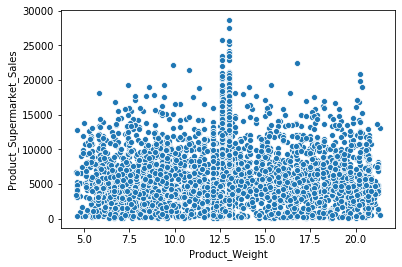

In [24]:
sns.scatterplot(x= train_data["Product_Weight"], y= train_data["Product_Supermarket_Sales"])
plt.show()

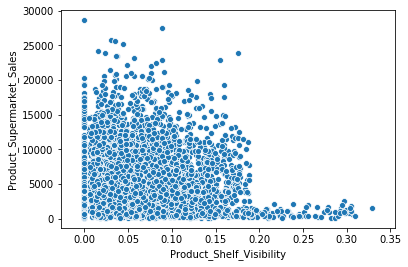

In [25]:
sns.scatterplot(x= train_data["Product_Shelf_Visibility"] , y= train_data["Product_Supermarket_Sales"])
plt.show()

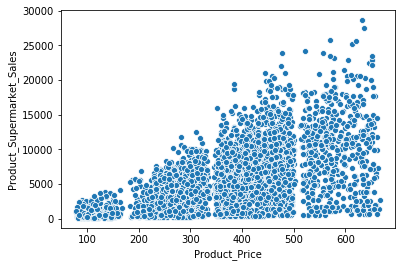

<Figure size 720x432 with 0 Axes>

In [26]:
sns.scatterplot(x= train_data["Product_Price"], y= train_data["Product_Supermarket_Sales"])
plt.figure(figsize=(10,6))
plt.show()

# Supermarket Type

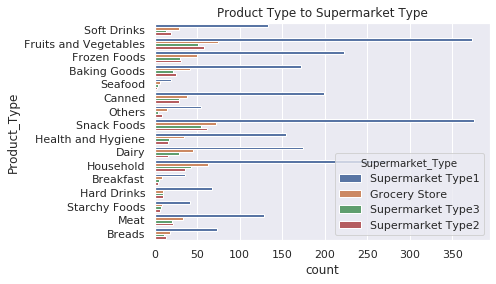

In [27]:
sns.set(style= "darkgrid")
sns.countplot(y= "Product_Type", hue= "Supermarket_Type",data= train_data)
plt.title("Product Type to Supermarket Type")
plt.show()
#This chart illustrates Supermarket Type 1 as the most sort after. it encompasses most of the products in large amount

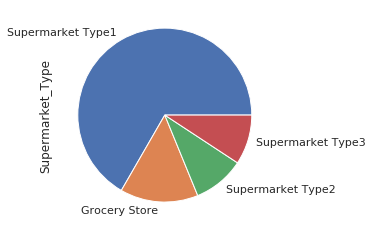

In [28]:
#Same illustration showing how much product can be found in Supermarket Type 1
train_data.Supermarket_Type.value_counts().plot(kind= 'pie')
plt.show()

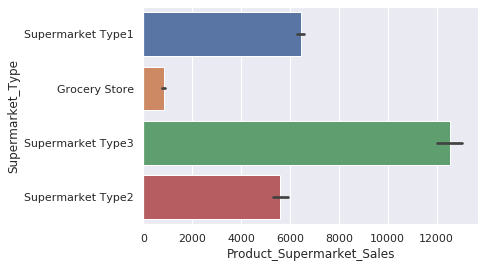

<Figure size 2880x1080 with 0 Axes>

In [29]:
sns.barplot(y= train_data["Supermarket_Type"], x= train_data["Product_Supermarket_Sales"])
plt.figure(figsize=(40,15))
plt.show()
#In respect to Product Supermarket Sales, Supermarket Type 3 makes the highest Sales

# Supermarket Location Type

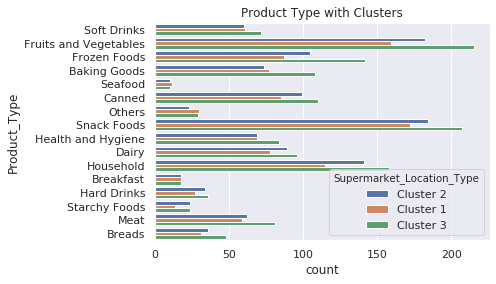

In [30]:
sns.set(style= "darkgrid")
sns.countplot(y= "Product_Type", hue= "Supermarket_Location_Type", data= train_data)
plt.title("Product Type with Clusters")
plt.show()
#Cluster 3 is seen to encompass more products

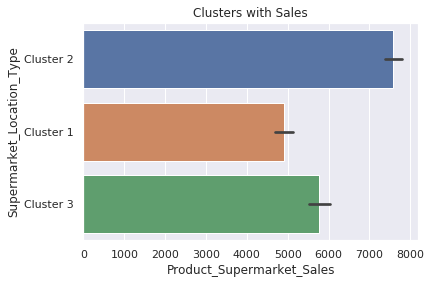

In [31]:
sns.barplot(y=train_data["Supermarket_Location_Type"], x= train_data["Product_Supermarket_Sales"])
plt.title("Clusters with Sales")
plt.show()
#But this shows Cluster 2 as the best sales making cluster

# Product Fat Content

In [32]:
PW= train_data.groupby("Product_Fat_Content").sum().reset_index()
PW
#Normal fat products are seen to have the best product weight but did poorly in making more sales

,Product_Fat_Content,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
0,Low Fat,29572.010962,145.731878,887751.19,4554761,13719482.67
1,Normal Fat,16954.849688,94.387238,530122.83,2688503,8431418.75
2,Ultra Low fat,1632.885550,9.147817,48298.89,258617,689276.27


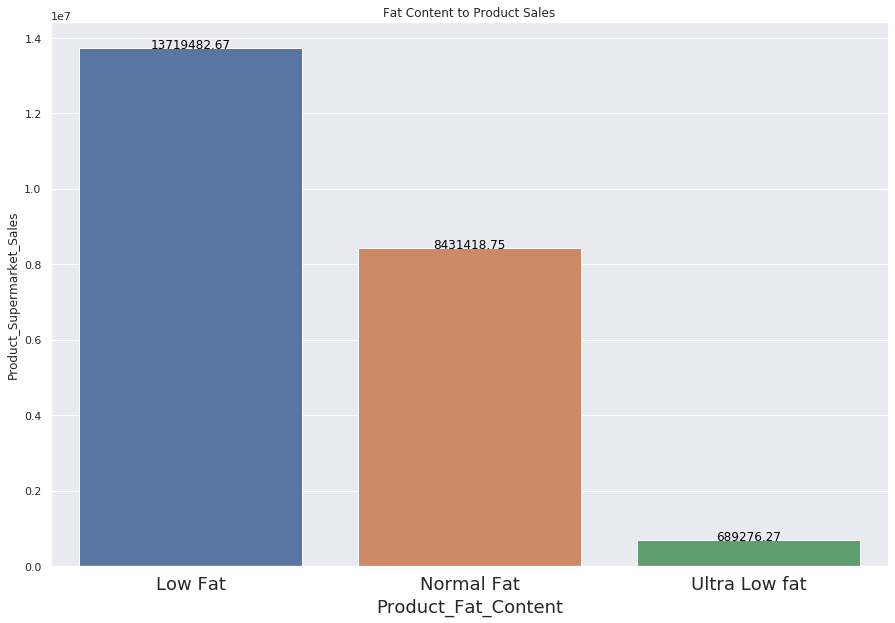

In [33]:
plt.figure(figsize= (15,10))
sns.set(style= "darkgrid")
g= sns.barplot(PW["Product_Fat_Content"], PW["Product_Supermarket_Sales"])
for index, row in PW.iterrows():
    g.text(row.name, row.Product_Supermarket_Sales, round(row.Product_Supermarket_Sales,2), color= "black", ha= "center")
    g.set_xticklabels(g.get_xticklabels(), fontsize= 18)
    g.set_xlabel("Product_Fat_Content", fontsize= 18)
plt.title("Fat Content to Product Sales")
plt.show()
#Product with Low fat seems to make the best sales

# Supermarket Size

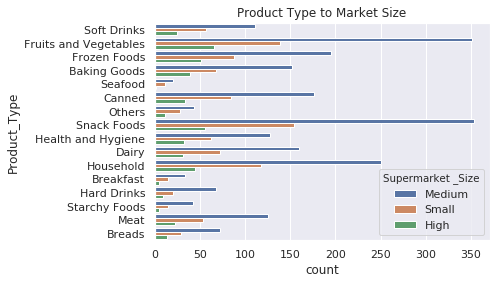

In [34]:
sns.set(style="darkgrid")
sns.countplot( y= "Product_Type", hue= "Supermarket _Size", data= train_data)
plt.title("Product Type to Market Size")
plt.show()
#Medium sized supermarket has most products

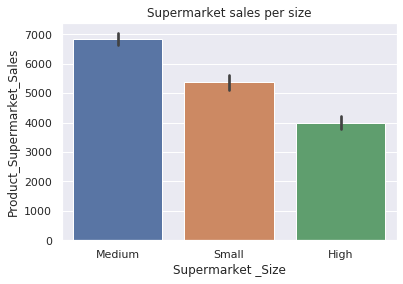

In [35]:
sns.barplot(train_data["Supermarket _Size"], train_data["Product_Supermarket_Sales"])
plt.title("Supermarket sales per size")
plt.show()
#This still ascertain medium sized supermarket as the best sales making market

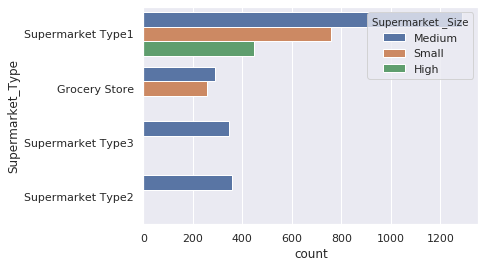

In [36]:
sns.set(style= "darkgrid")
sns.countplot(y= "Supermarket_Type", hue= "Supermarket _Size", data= train_data)
plt.show()

# Product Type

In [37]:
PV= train_data.groupby("Product_Type").sum().reset_index()
PV

,Product_Type,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
0,Baking Goods,3208.844488,18.269274,95163.09,519124,1459651.83
1,Breads,1311.449026,8.055160,46408.75,230550,675633.86
2,Breakfast,727.891437,4.539006,21352.17,108250,316865.91
3,Canned,3651.943025,19.774167,116092.52,589457,1879298.92
4,Dairy,3571.843825,18.342493,107774.69,527053,1599558.04
5,Frozen Foods,4329.307125,23.157398,128253.12,669491,1997338.49
6,Fruits and Vegetables,7243.232863,36.037500,221061.83,1114771,3574655.36
7,Hard Drinks,1158.101049,6.116369,36978.07,194549,591485.13
8,Health and Hygiene,2929.062197,11.871065,81554.62,444979,1215754.27
9,Household,5480.882081,25.697660,164991.98,829979,2549569.87


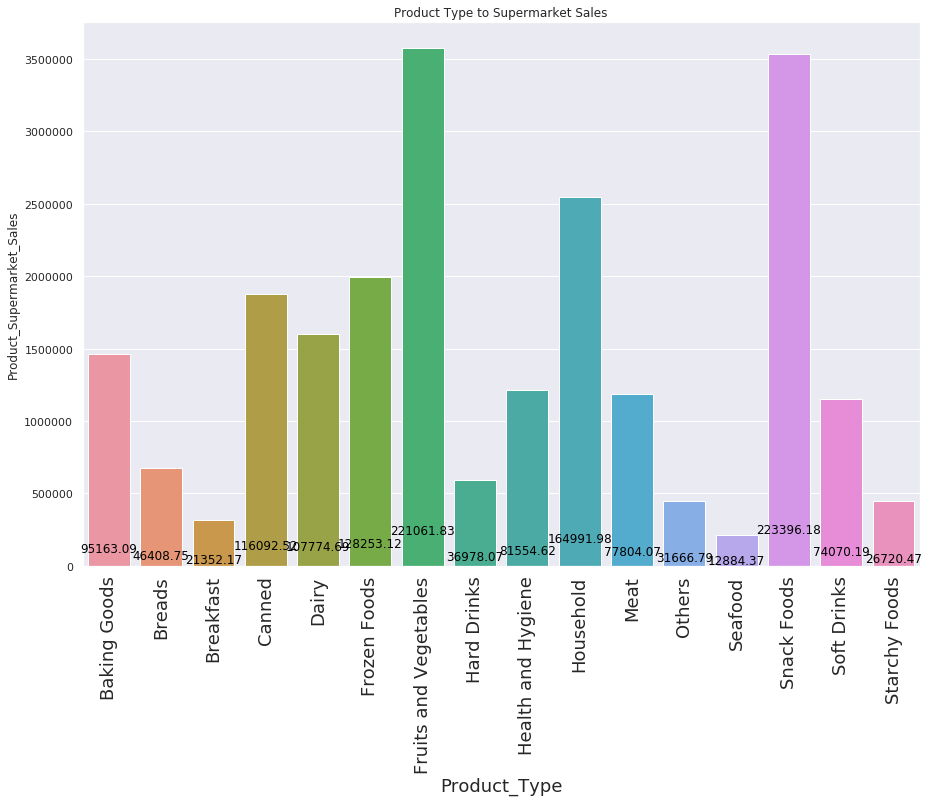

In [38]:
plt.figure(figsize= (15,10))
sns.set(style= "darkgrid")
g= sns.barplot(PV["Product_Type"],PV["Product_Supermarket_Sales"])
for index, row in PV.iterrows():
    g.text(row.name, row.Product_Price, round(row.Product_Price,2), color= 'black',ha= 'center')
    g.set_xticklabels(g.get_xticklabels(), rotation= 90, fontsize= 18)
    g.set_xlabel("Product_Type", fontsize= 18)
plt.title("Product Type to Supermarket Sales")
plt.show()
#We clearly see Sanck Foods, followed by Fruits and vegetables, Household, Frozen Foods to Canned as the Best Five Sales Making Products

Supermarket Type1    375
Grocery Store         72
Supermarket Type2     62
Supermarket Type3     54
Name: Supermarket_Type, dtype: int64


Text(0.5, 1.0, 'Best Market with Snack Food')

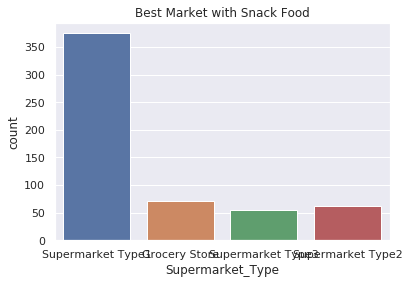

In [39]:
PT= train_data[train_data["Product_Type"] == "Snack Foods"]["Supermarket_Type"]
print(PT.value_counts())
sns.countplot(PT)
plt.title("Best Market with Snack Food")
#Supermarket Type 1 is seen to have the highest number of Snack Food but this doesnt clarify it to be making the best sales on Snack Foods
#Type 1 isn't but Type 3

#INFERENCES

#Regarding Mr Chukwudi's plan to expand his stores all over Nigeria and seemingly based on our visualization, we deduced that;
#Supermarket Type 3, Supermarket Location Cluster 2,and a medium sized supermarket are the best for his expansion
#Low Fat Content Product, Product Type like Snack Foods,Fruits and Vegetables are the best Sales Making Products

In [40]:
columns= ("Product_Identifier","Supermarket_Identifier","Product_Supermarket_Identifier","Product_Fat_Content","Product_Type","Supermarket _Size","Supermarket_Location_Type","Supermarket_Type")
for x in columns:
    Le= LabelEncoder()
    train_data[x]= Le.fit_transform(train_data[x].values)
train_data.dtypes

Product_Identifier                  int32
Supermarket_Identifier              int32
Product_Supermarket_Identifier      int32
Product_Weight                    float64
Product_Fat_Content                 int32
Product_Shelf_Visibility          float64
Product_Type                        int32
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                   int32
Supermarket_Location_Type           int32
Supermarket_Type                    int32
Product_Supermarket_Sales         float64
dtype: object

In [41]:
col= ("Product_Identifier","Supermarket_Identifier","Product_Supermarket_Identifier","Product_Fat_Content","Product_Type","Supermarket _Size","Supermarket_Location_Type","Supermarket_Type")
for y in col:
    Le= LabelEncoder()
    test_data[y]= Le.fit_transform(test_data[y].values)
test_data.dtypes

Product_Identifier                  int32
Supermarket_Identifier              int32
Product_Supermarket_Identifier      int32
Product_Weight                    float64
Product_Fat_Content                 int32
Product_Shelf_Visibility          float64
Product_Type                        int32
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                   int32
Supermarket_Location_Type           int32
Supermarket_Type                    int32
dtype: object

In [42]:
train_new= train_data.drop(["Product_Identifier","Supermarket_Identifier"], axis=1)
test_new= test_data.drop(["Product_Identifier","Supermarket_Identifier"], axis=1)

In [43]:
X= train_new.drop("Product_Supermarket_Sales", axis= 1)
y= train_new["Product_Supermarket_Sales"]
#X= preprocessing.scale(X)

In [44]:
train_x, val_x, train_y, val_y= train_test_split(X,y, test_size= 0.2, random_state= 60)

In [45]:
LR= LinearRegression()
val= LR.fit(train_x, train_y)
pred= val.predict(val_x)

In [46]:
print("mse:", mean_squared_error(pred,val_y))
print("r2_score:", r2_score(pred,val_y))
print("Rmse:", np.sqrt(mean_squared_error(pred,val_y)))

mse: 9591981.919495158
r2_score: 0.07239029108452577
Rmse: 3097.092494501118


In [47]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler

In [48]:

abr= AdaBoostRegressor(n_estimators= 50, learning_rate= 0.1, random_state=0)    
rfr = RandomForestRegressor( n_estimators= 100, random_state=0, verbose=False)


In [49]:
vall= abr.fit(train_x,train_y)
predd= vall.predict(val_x)

In [50]:
print("mse:", mean_squared_error(predd, val_y))
print("Rmse:", np.sqrt(mean_squared_error(predd,val_y)))

mse: 8359092.549959911
Rmse: 2891.2095306220735


In [51]:
abr.fit(X,y)
test_yhat= abr.predict(test_new)

In [52]:
submission= pd.read_csv("sample_submission.csv")
submission.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDC15_CHUKWUDI049,100
1,NCY06_CHUKWUDI018,100
2,DRB24_CHUKWUDI035,100
3,NCG54_CHUKWUDI018,100
4,NCA42_CHUKWUDI017,100


In [53]:
submission.Product_Supermarket_Sales = test_yhat
submission.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDC15_CHUKWUDI049,6795.821418
1,NCY06_CHUKWUDI018,5272.514694
2,DRB24_CHUKWUDI035,6583.107213
3,NCG54_CHUKWUDI018,7407.256186
4,NCA42_CHUKWUDI017,6795.821418


In [54]:
submission.to_csv("july.csv", index= False)